# Plot temperature response over time

This notebook plots temperature respons to SLCFs AND the total scenario forcing in a fixed nr of years

## Imports:

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import xarray as xr
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%load_ext autoreload
%autoreload 2

In [4]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic
from ar6_ch6_rcmipfigs.utils.plot import get_var_nicename

<IPython.core.display.Javascript object>

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in
hallo


In [5]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_recommendation.nc'

#### Uncertainty data from Chris

In [6]:
# PATH_DT_UNCERTAINTY = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris.nc'
PATH_DT_UNCERTAINTY = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris_ed02-3.nc'

## Set values:

In [7]:
first_y = '1750'
last_y = '2100'
# Years to plot:
years = ['2040', '2100']

**Set reference year for temperature change:**

In [8]:
ref_year = '2019'
ref_year_uncertainty = '2020'

In [9]:
FIGURE_DIR = RESULTS_DIR / 'figures_recommendation/'

TABS_DIR = RESULTS_DIR / 'tables_recommendation/'

In [10]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

In [11]:
recommendation = 'recommendation'
name_deltaT = 'Delta T'
sum_v = 'Sum SLCF (Aerosols, Methane, Ozone, HFCs)'

scenario_tot = 'Scenario total'

### Define variables to look at:

In [12]:
# variables to plot:
# variables_erf_comp = [
#    'ch4',
#    'aerosol-total',
#    'o3',
#    'HFCs',
#    'bc_on_snow']
variables_erf_comp = [
    'aerosol-total-with_bc-snow',
    'ch4',
    # 'aerosol-radiation_interactions',
    # 'aerosol-cloud_interactions',
    # 'aerosol-total',
    'o3',
    'HFCs',
    # 'bc_on_snow'
]

# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:

In [13]:

scenarios_fl_370 = ['ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden'  # Due to mistake here
                    ]

### Scenarios:

In [14]:
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp334',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']
scenarios_fl_oneNTCF = ['ssp119',
                        'ssp126',
                        'ssp245',
                        'ssp370',
                        'ssp370-lowNTCF-aerchemmip',
                        # 'ssp370-lowNTCF-gidden',
                        'ssp585']

In [15]:
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'

In [16]:
table_csv_name = TABS_DIR / '3-2_table_all_scen.csv'
print(table_csv_name)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables_recommendation/3-2_table_all_scen.csv


In [17]:

variables_tot = ['Total']
variables_sum = ['Sum SLCFs']


def setup_table_prop(scenario_n='', yrs=None, _vlist=None, scens=None):
    if _vlist is None:
        _vlist = variables_erf_comp
    if yrs is None:
        yrs = ['2040', '2100']
    if scens is None:
        scens = scenarios_fl
    its = [yrs, _vlist]
    _i = pd.MultiIndex.from_product(its, names=['', ''])
    table = pd.DataFrame(columns=scens, index=_i)  # .transpose()
    table.index.name = scenario_n
    return table

## Open dataset:

### Integrate:
The code below opens the file generated in [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) by integrating

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

where IRF is the impulse response function and ERF is the effective radiative forcing from RCMIP. 

In [18]:
ds_DT = xr.open_dataset(PATH_DT)
ds_uncertainty = xr.open_dataset(PATH_DT_UNCERTAINTY)

In [19]:
print(PATH_DT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP_recommendation.nc


## Add sum as variable:

In [20]:
_str = ''
_vl = [get_var_nicename(var).split('(')[0].strip() for var in variables_erf_comp]
for var in _vl:
    _str += f'{var}, '

# ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])


vn_sum = 'Sum SLCF (%s)' % _str[:-2]
print(vn_sum)

# _st = vn_sum.replace('(','').replace(')','').replace(' ','_').replace(',','')+'.csv'


_da_sum = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable)
# _da = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable).sel(year=slice(int(s_y2), int(e_y2))) - ds_DT_sy
_da_sum  # .assin_coord()
# _ds_check = ds_DT.copy()
ds_DT
# xr.concat([_ds_check[name_deltaT],_da_sum], dim=variable)

dd1 = _da_sum.expand_dims(
    {'variable':
         ['Sum SLCF (Aerosols, Methane, Ozone, HFCs)']})
# dd1=dd1.to_dataset()

ds_DT = xr.merge([ds_DT, dd1])

Sum SLCF (Aerosols, Methane, Ozone, HFCs)


## Compute sum of all SLCF forcers

In [21]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, get_scenario_ls_dic

In [22]:


cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()


def sum_name(_var):
    """
    Returns the name off the sum o
    """
    return f'{_var} sum '

### compute sum: 

sum_name = 'Sum SLCFs'
ds_sub = ds_DT.sel(variable=variables_erf_comp)
ds_sum = ds_sub.sum(variable)
ds_sum = ds_sum.assign_coords(coords={variable: sum_name})
# add sum to variable coordinatem

ds_sum = xr.concat([ds_sum, ds_DT.sel(variable=variables_erf_comp)], dim=variable)

In [23]:
ds_sum = ds_DT  # .assign_coords(coords={variable:sum_name})

rn_dic = {}
for v in variables_all:
    rn_dic[v] = get_var_nicename(v)

from ar6_ch6_rcmipfigs.utils.plot import scn_dic

rn_dic_scen = scn_dic

In [24]:
def fix_names(df):
    df = df.rename(rn_dic)
    df = df.rename(rn_dic_scen, axis=1)
    return df

In [25]:
scntab_dic = {}


# tab_tot = setup_table2()
# tab_tot_sd = setup_table2()
def table_of_sts(_ds, _scn_fl, variables, tab_vars, _yrs, ref_yr, sts=recommendation):
    """
    Creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios,

    :param _ds:
    :param _scn_fl:
    :param variables:
    :param tab_vars:
    :param _yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=_yrs, _vlist=tab_vars)
    for scn in _scn_fl:
        for _var, tabvar in zip(variables, tab_vars):
            # dtvar =  name_deltaT # if ERF name, changes it here.
            tabscn = scn  # Table scenario name the same.
            for year in _yrs:
                _da = _ds[name_deltaT].sel(scenario=scn, variable=_var)
                _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
                _da_y = _da.sel(year=slice(year, year))  # year value
                _tab_da = _da_y - _da_refy
                tabel.loc[(year, tabvar), tabscn] = float(_tab_da.sel(percentile=sts).squeeze().values)  # [0]
    return fix_names(tabel)
    # return tabel


def table_of_stats_varsums(_ds, dsvar, tabvar, yrs, ref_yr, sts=recommendation):
    """
    Sums up over dimension 'variable' and creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios. 

    :param tabvar:
    :param dsvar:
    :param _ds:
    :param yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=yrs, _vlist=[tabvar])
    da = _ds[name_deltaT].sel(variable=dsvar)

    for scn in scenarios_fl:
        tabscn = scn  # Table scenario name the same.
        for year in yrs:
            _da = da.sel(scenario=scn, percentile=sts)  # , variable = dsvar)
            _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
            _da_y = _da.sel(year=slice(year, year)).squeeze()  # year value
            _tab_da = (_da_y - _da_refy).squeeze()

            # Do statistics over RCMIP models
            tabel.loc[(year, tabvar), tabscn] = float(_tab_da.squeeze().values)  # [0]

    return tabel

### Computes statistics:

In [26]:
ds_uncertainty = ds_uncertainty.to_array('percentile').rename(name_deltaT).to_dataset()
ds_uncertainty

<xarray.Dataset>
Dimensions:      (base_period: 1, percentile: 10, scenario: 11, variable: 8, year: 81)
Coordinates:
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'aerosol-total-with_bc-snow'
  * percentile   (percentile) <U7 'p05' 'p16' 'p50' ... 'p84-p50' 'p95-p50'
Data variables:
    Delta T      (percentile, scenario, variable, year, base_period) float64 0.0 ... 0.1942

In [27]:
ds_DT.percentile

<xarray.DataArray 'percentile' (percentile: 1)>
array(['recommendation'], dtype=object)
Coordinates:
  * percentile  (percentile) object 'recommendation'

In [28]:
ds_DT.variable.values

array(['HFCs', 'Sum SLCF (Aerosols, Methane, Ozone, HFCs)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc-snow', 'bc_on_snow', 'ch4',
       'co2', 'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic',
       'total_natural', 'volcanic'], dtype=object)

In [29]:
from ar6_ch6_rcmipfigs.utils.plot import nice_name_var as nice_name_var_dic

## Make csv table:


In [30]:
import pandas as pd

In [31]:
# Mean:
o3 = 'Ozone (O$_3$)'
ch4 = 'Methane (CH$_4$)'
HFCs = 'HFCs'
_sum = 'CH$_4$+O$_3$+HFCs'
sum_v

'Sum SLCF (Aerosols, Methane, Ozone, HFCs)'

In [32]:
# Statistics on Delta T anthropogenic
# Mean
scenario_tot = 'Scenario total'

In [33]:
tabel_dT_anthrop = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years, ref_year)
# 5th
tabel_dT_anthrop_5th = -table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     ['total_anthropogenic'],
                                     [scenario_tot],
                                     years,
                                     ref_year_uncertainty,
                                     sts='p05-p50'
                                     )
# 95th

tabel_dT_anthrop_95th = table_of_sts(ds_uncertainty, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years,
                                     ref_year_uncertainty,
                                     sts='p95-p50')
tabel_dT_anthrop_95th.loc['2040']
tabel_dT_anthrop_5th.loc['2040']

,SSP1-1.9,SSP1-2.6,SSP2-4.5,SSP3-3.4,SSP3-7.0,SSP3-7.0-LowSLCF-HighCH$_4$,SSP3-7.0-LowSLCF-LowCH$_4$,SSP5-8.5
,,,,,,,,
Scenario total,0.182997,0.185355,0.15336,0.142286,0.153791,0.184775,0.163584,0.209253


In [34]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp, years,
                              ref_year)

# Compute sum of SLCFs
_ds = ds_sum.copy()

v_sum = 'Sum SLCF (Aerosols, Methane, Ozone, HFCs)'
ds_uncertainty.sel(year=2040, scenario='ssp119', percentile='p05-p50',
                   variable=v_sum)  # .variables#.plot()#, variable='%%SVG')%%SVG

<xarray.Dataset>
Dimensions:      (base_period: 1)
Coordinates:
    year         int64 2040
  * base_period  (base_period) int64 2020
    scenario     <U6 'ssp119'
    variable     <U41 'Sum SLCF (Aerosols, Methane, Ozone, HFCs)'
    percentile   <U7 'p05-p50'
Data variables:
    Delta T      (base_period) float64 -0.1267

In [35]:
tabel_dT_sum_slcf = table_of_sts(ds_DT,
                                 scenarios_fl,
                                 [sum_v],
                                 ['Sum SLCFs'],
                                 years,
                                 ref_year
                                 )
tabel_dT_sum_slcf_5 = - table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     [sum_v],
                                     ['Sum SLCFs'],
                                     years,
                                     ref_year_uncertainty,
                                     sts='p05-p50')
tabel_dT_sum_slcf_95 = table_of_sts(ds_uncertainty,
                                    scenarios_fl,
                                    [sum_v],
                                    ['Sum SLCFs'],
                                    years,
                                    ref_year_uncertainty,
                                    sts='p95-p50')

In [36]:

tabel_dT_slcfs = fix_names(tabel_dT_slcfs)  # .rename(rn_dic)
# tabel_dT_slcfs = tabel_dT_slcfs.rename(rn_dic_scen,axis=1)
tabel_dT_slcfs  # .index

SSP1-1.9     SSP1-2.6    SSP2-4.5    SSP3-3.4  \
                                                                         
2040 Aerosols              0.2919     0.244711   0.0567248   0.0522341   
     Methane (CH$_4$)   -0.030381    -0.018502   0.0461963   0.0528061   
     Ozone (O$_3$)     -0.0875336   -0.0643342   0.0144792  -0.0233704   
     HFCs              0.00681278     0.018659   0.0303215  0.00681278   
2100 Aerosols            0.445276     0.454098    0.296192    0.302949   
     Methane (CH$_4$)   -0.163022    -0.155442  0.00250472 -0.00081127   
     Ozone (O$_3$)      -0.154183    -0.153245  -0.0476062  -0.0731102   
     HFCs             -0.00254577 -0.000206338   0.0599126 -0.00254577   

                        SSP3-7.0 SSP3-7.0-LowSLCF-HighCH$_4$  \
                                                               
2040 Aerosols          -0.061394                   0.0865772   
     Methane (CH$_4$)  0.0816393                   0.0816393   
     Ozone (O$_3$)     0.0745486                   0.0261561   
     HFCs              0.0281637                   0.0281637   
2100 Aerosols           -0.03541                    0.287903   
     Methane (CH$_4$)   0.285313                    0.285313   
     Ozone (O$_3$)      0.243788                    0.161463   
     HFCs              0.0998195                   0.0998195   

                      SSP3-7.0-LowSLCF-LowCH$_4$   SSP5-8.5  
                                                             
2040 Aerosols                          0.0865772   0.143221  
     Methane (CH$_4$)                 -0.0326403  0.0663295  
     Ozone (O$_3$)                    -0.0437328  0.0419436  
     HFCs                              0.0281684  0.0443504  
2100 Aerosols                           0.287903   0.254679  
     Methane (CH$_4$)                  -0.120541   0.153352  
     Ozone (O$_3$)                    -0.0992323  0.0526531  
     HFCs                              0.0863879    0.22836

In [37]:
rn_dic

{'aerosol-total-with_bc-snow': 'Aerosols',
 'ch4': 'Methane (CH$_4$)',
 'o3': 'Ozone (O$_3$)',
 'HFCs': 'HFCs',
 'total_anthropogenic': 'total_anthropogenic',
 'total': 'total'}

## colors

In [38]:
cdic = get_cmap_dic(variables_erf_comp)  # , palette='colorblind'):
ls = [cdic[key] for key in variables_erf_comp]

ls

(0.5607843137254902, 0.0, 0.6470588235294118)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)


[(0.5607843137254902, 0.0, 0.6470588235294118),
 (1.0, 0.4196078431372549, 0.07450980392156863),
 (0.5254901960784314, 0.7803921568627451, 0.29411764705882354),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

In [39]:
cdic

{'aerosol-total-with_bc-snow': (0.5607843137254902, 0.0, 0.6470588235294118),
 'ch4': (1.0, 0.4196078431372549, 0.07450980392156863),
 'o3': (0.5254901960784314, 0.7803921568627451, 0.29411764705882354),
 'HFCs': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)}

## Error bars only from model uncertainty
The following uncertainties assume the ECS has a standard deviation of

In [40]:
from ar6_ch6_rcmipfigs.utils.plot import scn_dic

In [41]:

def plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_slcfs, tabel_dT_anthrop_5th, tabel_dT_anthrop_95th,
                tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95):
    tits = ['Change in GSAT in 2040 relative to 2019', 'Change in GSAT in 2100 relative to 2019']
    for yr, ax, tit in zip(years, axs, tits):
        # Pick out year and do various renames:
        # Total antropogenic
        tot_yr = tabel_dT_anthrop.loc[yr].rename(scn_dic, axis=1)
        # Sum SLCFs
        # uncertainty:
        bot = tabel_dT_anthrop_5th.loc[yr].rename(scn_dic, axis=1)
        top = tabel_dT_anthrop_95th.loc[yr].rename(scn_dic, axis=1)
        err = pd.merge(bot, top, how='outer').values
        # Plot bars for anthropopogenic total:
        ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values,
                color='k',
                xerr=err,
                error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2),
                label='Scenario total', alpha=.2,
                )
        # Plot bars for SLCFs total:

        # Plot stacked plot of components:
        _tab = tabel_dT_slcfs.loc[yr].transpose().rename(
            {'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
        _tab = _tab.rename(scn_dic, axis=0)
        a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
        _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
        # ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
        # uncertainty:
        bot = tabel_dT_sum_slcf_5.loc[yr].rename(scn_dic, axis=1)
        top = tabel_dT_sum_slcf_95.loc[yr].rename(scn_dic, axis=1)
        err = pd.merge(bot, top, how='outer').values

        ax.errorbar(_t, list(_t.reset_index().index), xerr=err, label='__nolabel__', color='w', fmt='d',
                    linestyle="None")  # ,

        if not yr == '2040':
            ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
        # Zero line:
        ax.axvline(0, linestyle='--', color='k', alpha=0.4)
        ax.set_title(tit)
        ax.set_xlabel('Change in GSAT ($^\circ$C)')
        ax.xaxis.set_minor_locator(MultipleLocator(.1))

def fix_axs(axs):
    ax = axs[0]

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(right=False, left=False)  # , color='w')

    ax = axs[1]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(labelleft=False, right=False, left=False, color='w')
    ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
    ax.yaxis.set_visible(False)
    plt.tight_layout()

In [42]:
for tab in [tabel_dT_anthrop, tabel_dT_sum_slcf, tabel_dT_slcfs]:
    tab

In [43]:
tabel_dT_sum_slcf_5.rename(scn_dic, axis=1)

,,SSP1-1.9,SSP1-2.6,SSP2-4.5,SSP3-3.4,SSP3-7.0,SSP3-7.0-LowSLCF-HighCH$_4$,SSP3-7.0-LowSLCF-LowCH$_4$,SSP5-8.5
,,,,,,,,,
2040,Sum SLCFs,0.126748,0.114972,0.0463691,0.0405653,0.0794694,0.0630824,0.0459617,0.0932667
2100,Sum SLCFs,0.191259,0.189288,0.181712,0.133621,0.149032,0.251273,0.154966,0.230278


In [44]:
from matplotlib.ticker import MultipleLocator

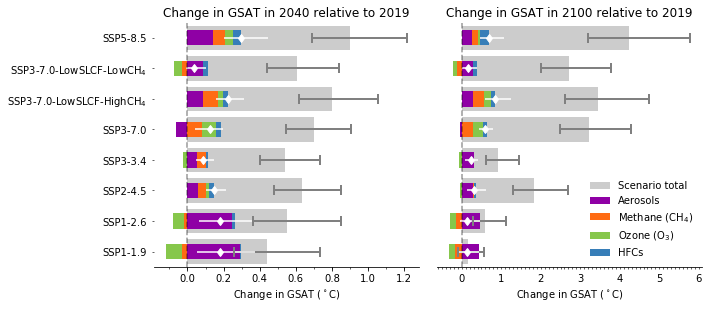

In [45]:
fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_slcfs, tabel_dT_anthrop_5th, tabel_dT_anthrop_95th,
            tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years.png'
plt.tight_layout()
# ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [46]:

scen_no_lowNTCF = [scn for scn in scenarios_fl if 'lowNTCF' not in scn]
print(scen_no_lowNTCF)

['ssp119', 'ssp126', 'ssp245', 'ssp334', 'ssp370', 'ssp585']


In [47]:
subset_scenarios = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))

In [48]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [49]:
tabel_dT_slcfs2

SSP1-1.9     SSP1-2.6    SSP2-4.5   SSP3-7.0  \
                                                                        
2040 Aerosols              0.2919     0.244711   0.0567248  -0.061394   
     Methane (CH$_4$)   -0.030381    -0.018502   0.0461963  0.0816393   
     Ozone (O$_3$)     -0.0875336   -0.0643342   0.0144792  0.0745486   
     HFCs              0.00681278     0.018659   0.0303215  0.0281637   
2100 Aerosols            0.445276     0.454098    0.296192   -0.03541   
     Methane (CH$_4$)   -0.163022    -0.155442  0.00250472   0.285313   
     Ozone (O$_3$)      -0.154183    -0.153245  -0.0476062   0.243788   
     HFCs             -0.00254577 -0.000206338   0.0599126  0.0998195   

                      SSP3-7.0-LowSLCF-HighCH$_4$   SSP5-8.5  
                                                              
2040 Aerosols                           0.0865772   0.143221  
     Methane (CH$_4$)                   0.0816393  0.0663295  
     Ozone (O$_3$)                      0.0261561  0.0419436  
     HFCs                               0.0281637  0.0443504  
2100 Aerosols                            0.287903   0.254679  
     Methane (CH$_4$)                    0.285313   0.153352  
     Ozone (O$_3$)                       0.161463  0.0526531  
     HFCs                               0.0998195    0.22836

- Include BC in aerosol total.
- aaarggh, sorry, a last request, maybe one version with also SSP370lowNTC with and without CH4 decrease (as it was in SOD) and one without and we will see later which one we choose depending on the discussion which will remain in the TS.
- net values. Send.
- include total in black.

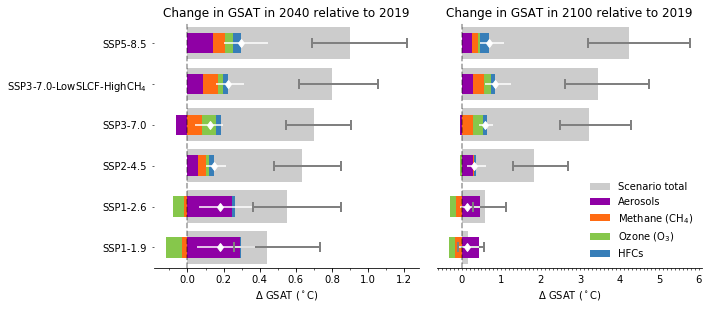

In [50]:

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_slcfs2, tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)
fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

plt.show()

In [51]:
# tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
# tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]

subset_scenarios = list(pd.Series(scen_no_lowNTCF).replace(rn_dic_scen))

In [52]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [53]:
tabel_dT_slcfs2

SSP1-1.9     SSP1-2.6    SSP2-4.5    SSP3-3.4  \
                                                                         
2040 Aerosols              0.2919     0.244711   0.0567248   0.0522341   
     Methane (CH$_4$)   -0.030381    -0.018502   0.0461963   0.0528061   
     Ozone (O$_3$)     -0.0875336   -0.0643342   0.0144792  -0.0233704   
     HFCs              0.00681278     0.018659   0.0303215  0.00681278   
2100 Aerosols            0.445276     0.454098    0.296192    0.302949   
     Methane (CH$_4$)   -0.163022    -0.155442  0.00250472 -0.00081127   
     Ozone (O$_3$)      -0.154183    -0.153245  -0.0476062  -0.0731102   
     HFCs             -0.00254577 -0.000206338   0.0599126 -0.00254577   

                        SSP3-7.0   SSP5-8.5  
                                             
2040 Aerosols          -0.061394   0.143221  
     Methane (CH$_4$)  0.0816393  0.0663295  
     Ozone (O$_3$)     0.0745486  0.0419436  
     HFCs              0.0281637  0.0443504  
2100 Aerosols           -0.03541   0.254679  
     Methane (CH$_4$)   0.285313   0.153352  
     Ozone (O$_3$)      0.243788  0.0526531  
     HFCs              0.0998195    0.22836

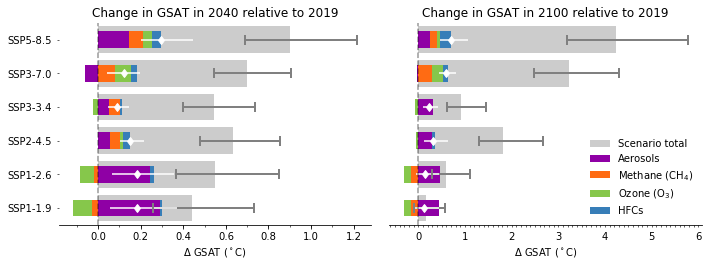

In [54]:

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.8], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_slcfs2, tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [55]:
# tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
# tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]

scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]
subset_scenarios = list(pd.Series(scenario_370).replace(rn_dic_scen))

In [56]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

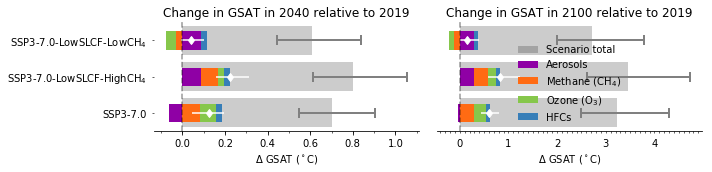

In [57]:

fig, axs = plt.subplots(1, len(years), figsize=[10, 2.5], sharex=False, sharey=True)

plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_slcfs2, tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_horiz_errTot_370only.png'

plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [58]:
variables_erf_comp

['aerosol-total-with_bc-snow', 'ch4', 'o3', 'HFCs']

In [59]:
variables_erf_comp_nbc = ['ch4', 'aerosol-total-with_bc-snow', 'o3', 'HFCs']

In [61]:
tabel_dT_anthrop

,,SSP1-1.9,SSP1-2.6,SSP2-4.5,SSP3-3.4,SSP3-7.0,SSP3-7.0-LowSLCF-HighCH$_4$,SSP3-7.0-LowSLCF-LowCH$_4$,SSP5-8.5
,,,,,,,,,
2040,Scenario total,0.441451,0.549258,0.631925,0.542039,0.700191,0.799816,0.606025,0.8999
2100,Scenario total,0.154063,0.587645,1.82018,0.919342,3.22891,3.45874,2.7216,4.23102


In [68]:
subset_scenarios_nn = [rn_dic_scen[scn] for scn in  subset_scenarios]

In [73]:
subset_scen_fl = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))
tabel_dT_slcfs_noBC = table_of_sts(ds_DT, scenarios_fl_oneNTCF, variables_erf_comp_nbc, variables_erf_comp_nbc,
                                   years,
                                   ref_year)

In [74]:
subset_scenarios = subset_scen_fl
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs_noBC[subset_scenarios]

In [76]:
subset_scen_fl = list(pd.Series(scenarios_fl).replace(rn_dic_scen))
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl]

SSP1-1.9                       0.180799
SSP1-2.6                       0.180534
SSP2-4.5                       0.147722
SSP3-3.4                       0.088483
SSP3-7.0                       0.122958
SSP3-7.0-LowSLCF-HighCH$_4$    0.222536
SSP3-7.0-LowSLCF-LowCH$_4$     0.038372
SSP5-8.5                       0.295845
dtype: float64
SSP1-1.9                       0.125524
SSP1-2.6                       0.145206
SSP2-4.5                       0.311004
SSP3-3.4                       0.226482
SSP3-7.0                       0.593510
SSP3-7.0-LowSLCF-HighCH$_4$    0.834498
SSP3-7.0-LowSLCF-LowCH$_4$     0.154517
SSP5-8.5                       0.689044
dtype: float64


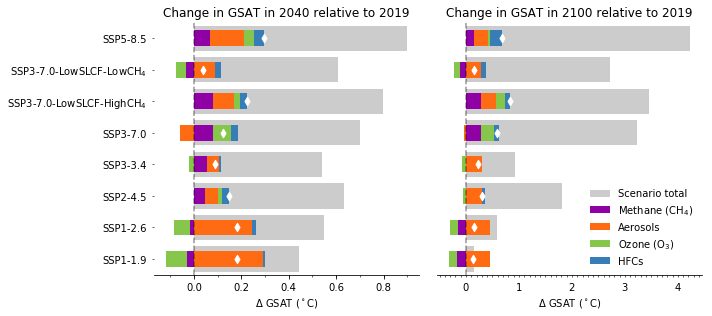

In [77]:

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.5], sharex=False, sharey=True)
tits = ['Change in GSAT in 2040 relative to 2019', 'Change in GSAT in 2100 relative to 2019']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {
            'Total': scenario_tot,
            'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'
        }
    )
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_all_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)